In [27]:
#!/usr/bin/env python3
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time

import tensorflow as tf

from src.architecture import FootpathModelArchitecture
from src.miscellaneous import load_random_image, preprocess_image, save_predicted_mask
from src.visualization import create_overlay, display_images

## Load and prepare parameters

In [2]:
parameter_directory = './parameters/'
parameter_file = 'testing.json'
parameter_path = parameter_directory + parameter_file

In [3]:
with open(parameter_path) as parameter_file:
    parameters = json.load(parameter_file)

In [4]:
model_parameters = parameters['model']
test_data_parameters = parameters['test_data']
output_parameters = parameters['output']

## Build the model structure

In [5]:
image_parameters = test_data_parameters['image_dimensions']
input_width = image_parameters['width']
input_height = image_parameters['height']
image_dimensions = (input_width, input_height)
input_shape = (input_width, input_height, 3)

In [6]:
footpath_model = FootpathModelArchitecture(input_shape).footpath_model

## Load weights

In [7]:
model_directory = model_parameters['root_directory']

In [8]:
model_file = model_parameters['model_file_name']

In [9]:
footpath_model.load_weights(model_directory + model_file)

## Visualize predictions of the model and measure how long it takes to predict a mask.

In [25]:
def visualize_predictions(test_data_directory, number_of_examples, measure_inference_time=False):
    
    test_image_names = os.listdir(test_data_directory)
    
    for i in range(number_of_examples):
        test_image = load_random_image(test_data_directory, image_dimension=image_dimensions)
        preprocessed_image = preprocess_image(test_image, expand_dimension=True)

        if (measure_inference_time):
            start_time = time.time()
            predicted_mask = footpath_model.predict(preprocessed_image)
            end_time = time.time()
        else:
            predicted_mask = footpath_model.predict(preprocessed_image)

        predicted_mask = predicted_mask > 0.5
        overlay = create_overlay(test_image, predicted_mask, alpha=0.3, from_prediction=True)
        display_images([test_image, predicted_mask, overlay], ['origin', 'predicted_mask', 'overlay'])
        if (measure_inference_time):
            print("Inference time: ", round(end_time-start_time, 2))

In [21]:
test_data_directory = test_data_parameters['test_data_directory']

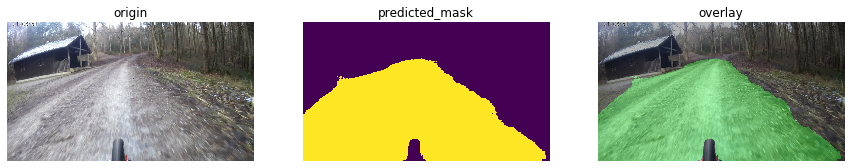

Inference time:  4.37


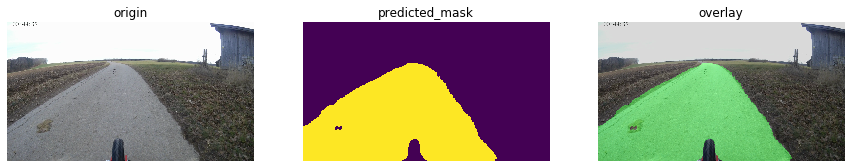

Inference time:  4.56


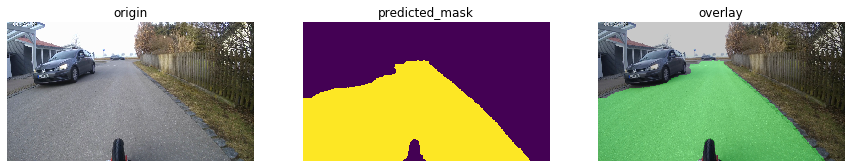

Inference time:  4.51


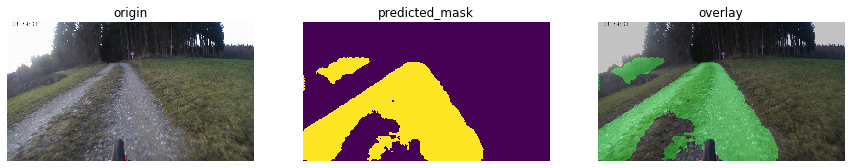

Inference time:  4.55


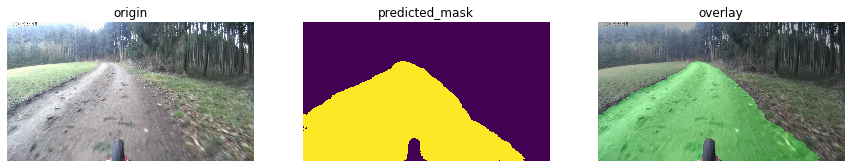

Inference time:  4.51


In [26]:
visualize_predictions(test_data_directory, 5, True)